# Explore here

In [66]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

# modelado (install scikit-learn)
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge


# metricas
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

from pickle import dump



# optimizar
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV# Your code here

In [67]:
archivo="https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv"

df_original = pd.read_csv(archivo, sep=",")
df = pd.read_csv(archivo, sep=",")

df.head()

datos,atributos=df.shape
print(f"Contamos con {datos} cantidad de datos y {atributos} atributos.")
print()

# Valores duplicados

duplicados = df.duplicated()
num_duplicados = duplicados.sum()

print(f"Contamos con {num_duplicados} dato duplicado.")
print()

df.info()

Contamos con 768 cantidad de datos y 9 atributos.

Contamos con 0 dato duplicado.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


/tmp/ipykernel_4892/252558336.py:31: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


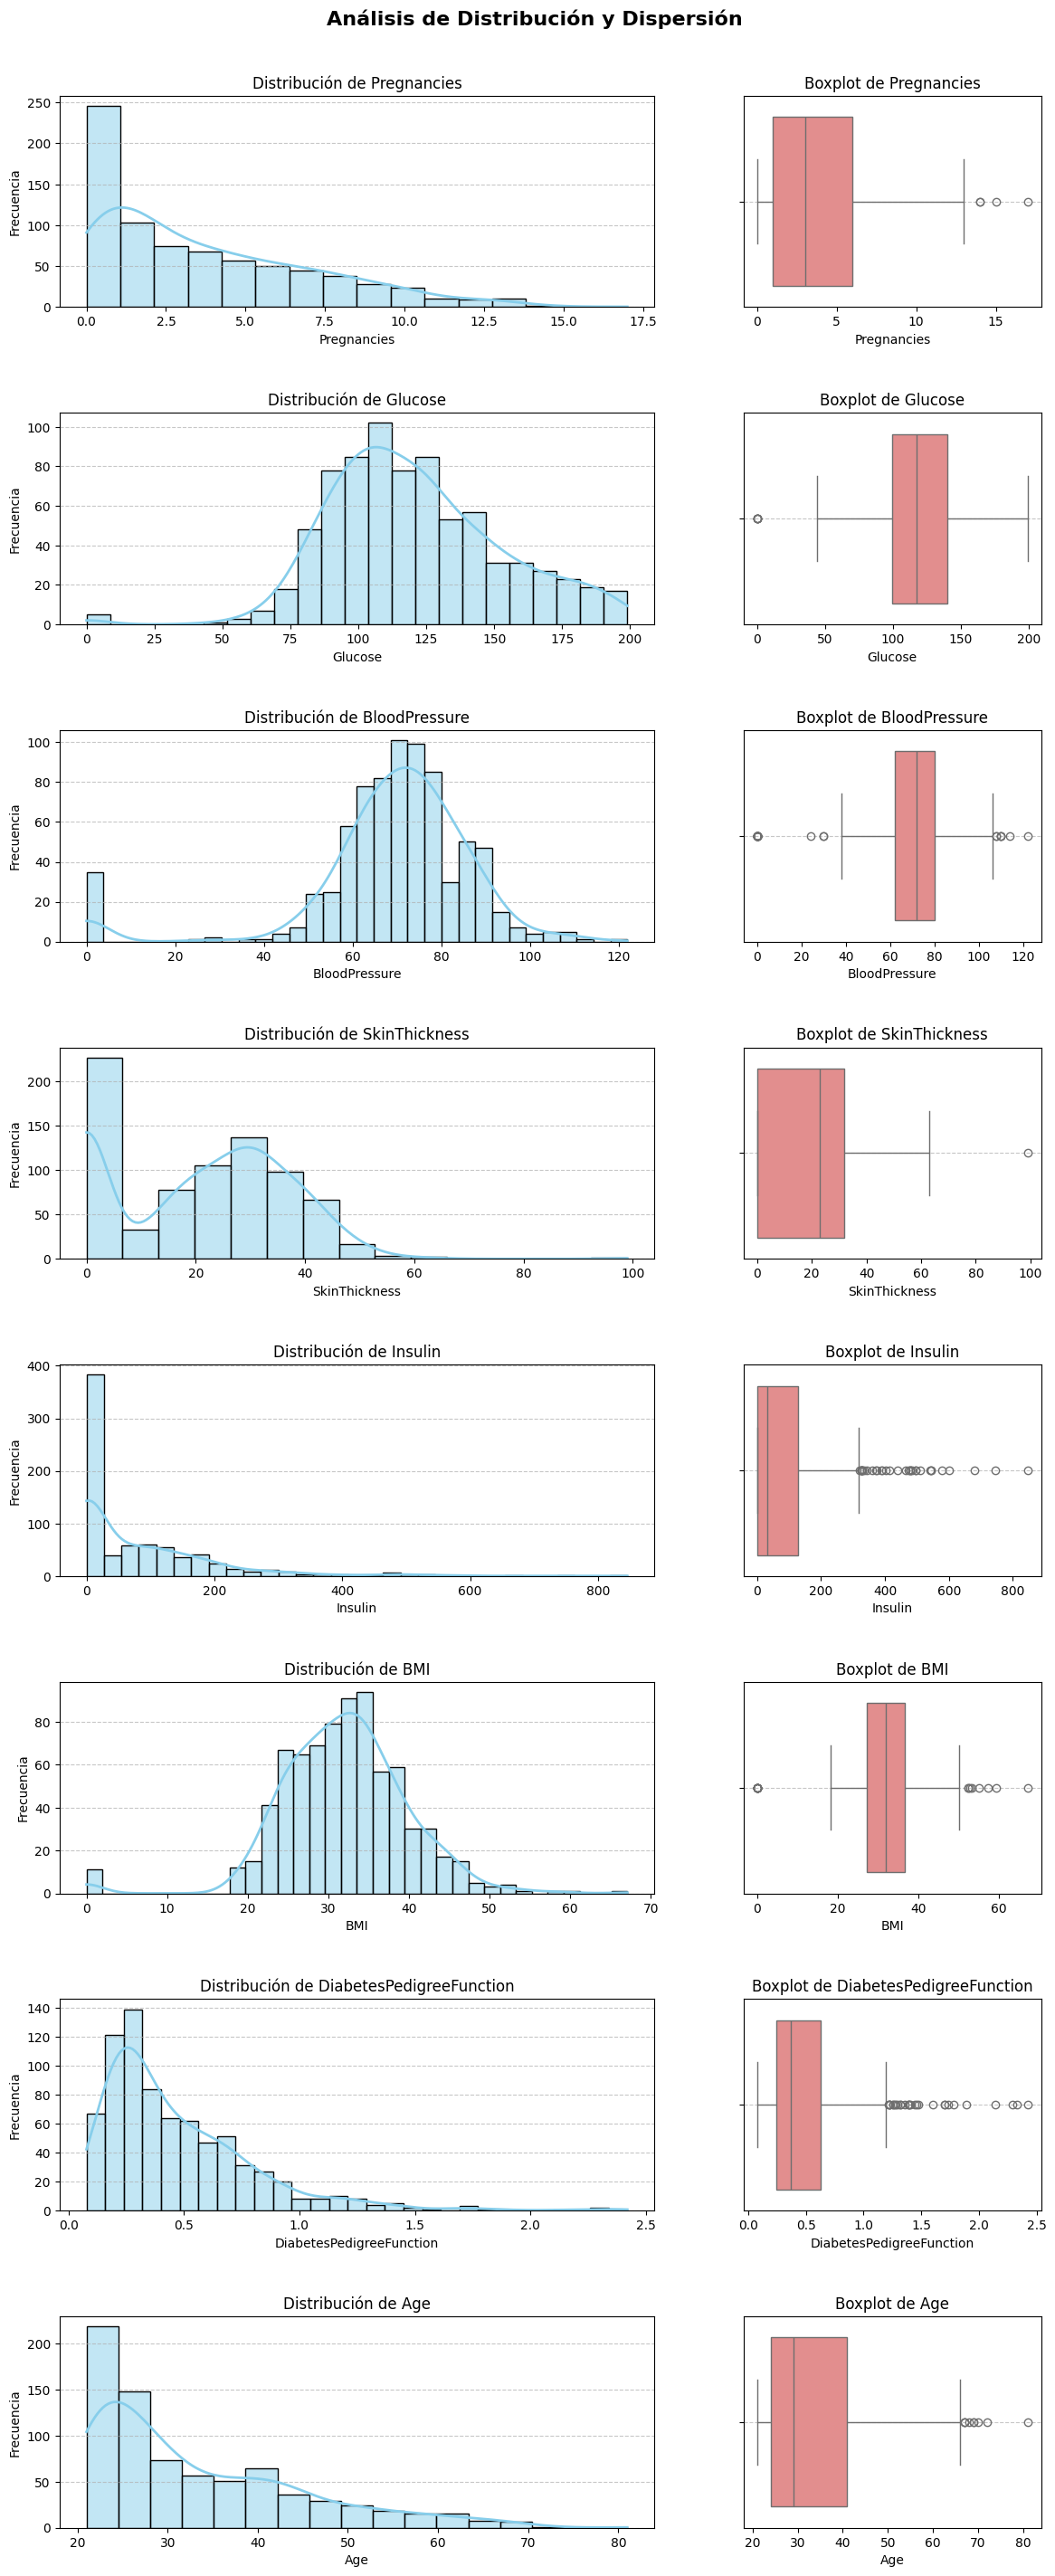

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt
# Variables numéricas
variables = df.columns[:-1] # Sin la variable Outcome
# Crear una figura con subplots
fig, axes = plt.subplots(
    len(variables), 2, figsize=(14, len(variables) * 4), 
    gridspec_kw={'width_ratios': [2, 1], 'hspace': 0.5}
)

# Iterar por cada variable y generar gráficos
for i, var in enumerate(variables):
    # Histograma con KDE
    sns.histplot(
        data=df, x=var, kde=True, color='skyblue', ax=axes[i, 0], 
        line_kws={'color': 'darkblue', 'lw': 2}
    )
    axes[i, 0].set(
        title=f"Distribución de {var}", xlabel=var, ylabel="Frecuencia"
    )
    axes[i, 0].grid(axis='y', linestyle='--', alpha=0.7)
    
    # Boxplot
    sns.boxplot(data=df, x=var, ax=axes[i, 1], color='lightcoral')
    axes[i, 1].set(
        title=f"Boxplot de {var}", xlabel=var, ylabel=None
    )
    axes[i, 1].grid(axis='y', linestyle='--', alpha=0.7)

# Ajustar diseño general
plt.tight_layout()
plt.subplots_adjust(top=0.95)
fig.suptitle("Análisis de Distribución y Dispersión", fontsize=16, fontweight='bold')
plt.show()


In [69]:
# Función para detectar valores atípicos usando IQR y mostrar límites
def detectar_outliers_iqr(data, variables):
    outliers = {}
    limites = {}  # Diccionario para almacenar límites
    for var in variables:
        Q1 = data[var].quantile(0.25)  # Primer cuartil
        Q3 = data[var].quantile(0.75)  # Tercer cuartil
        IQR = Q3 - Q1                 # Rango intercuartílico
        lower_bound = Q1 - 1.5 * IQR  # Límite inferior
        upper_bound = Q3 + 1.5 * IQR  # Límite superior

        # Guardar límites
        limites[var] = {'lower_bound': lower_bound, 'upper_bound': upper_bound}

        # Filtrar valores atípicos
        outliers[var] = data[(data[var] < lower_bound) | (data[var] > upper_bound)][var]

    return outliers, limites

# Aplicar la función
outliers_detectados, limites_detectados = detectar_outliers_iqr(df, variables)

# Mostrar resumen
for var, outliers in outliers_detectados.items():
    print(f"\nVariable: {var}")
    print(f"Límite inferior (lower bound): {limites_detectados[var]['lower_bound']}")
    print(f"Límite superior (upper bound): {limites_detectados[var]['upper_bound']}")
    print(f"Número de valores atípicos: {len(outliers)}")
    print(f"Valores atípicos:\n{outliers.values}")


Variable: Pregnancies
Límite inferior (lower bound): -6.5
Límite superior (upper bound): 13.5
Número de valores atípicos: 4
Valores atípicos:
[15 17 14 14]

Variable: Glucose
Límite inferior (lower bound): 37.125
Límite superior (upper bound): 202.125
Número de valores atípicos: 5
Valores atípicos:
[0 0 0 0 0]

Variable: BloodPressure
Límite inferior (lower bound): 35.0
Límite superior (upper bound): 107.0
Número de valores atípicos: 45
Valores atípicos:
[  0   0  30 110   0   0   0   0 108 122  30   0 110   0   0   0   0   0
   0   0   0   0   0 108   0   0   0   0   0   0   0   0   0   0 110   0
  24   0   0   0   0 114   0   0   0]

Variable: SkinThickness
Límite inferior (lower bound): -48.0
Límite superior (upper bound): 80.0
Número de valores atípicos: 1
Valores atípicos:
[99]

Variable: Insulin
Límite inferior (lower bound): -190.875
Límite superior (upper bound): 318.125
Número de valores atípicos: 34
Valores atípicos:
[543 846 342 495 325 485 495 478 744 370 680 402 375 545 3

In [70]:
# Filtrar las filas donde Glucose, BloodPressure, BMI sea diferente de 0.
df=df[df["Glucose"] != 0]

df=df[df["BloodPressure"] != 0]

df = df[df['BMI'] != 0]

df = df[df['SkinThickness'] != 99]
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [71]:
#valores faltantes
df.isnull().sum().sort_values(ascending=False)


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [72]:
# Dividimos el conjunto de datos en muestras de train y test
X = df.drop("Outcome", axis = 1)
y = df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.shape

(578, 8)

In [73]:
num_variables=X_train.columns

# instancio el escalador
scaler = StandardScaler()

# entreno el escalador con los datos de entrenamiento
scaler.fit(X_train[num_variables])

# aplico el escalador en amhos
X_train_num_scal = scaler.transform(X_train[num_variables])
X_train_num_scal = pd.DataFrame(X_train_num_scal, index = X_train.index, columns = num_variables)

X_test_num_scal = scaler.transform(X_test[num_variables])
X_test_num_scal = pd.DataFrame(X_test_num_scal, index = X_test.index, columns = num_variables)

X_train_num_scal.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
474,0.040997,-0.278257,-0.676255,-1.371949,-0.722044,-0.513863,-1.027192,-0.797677
6,-0.258957,-1.452932,-1.800153,0.677112,0.015679,-0.214397,-0.671709,-0.628202
387,1.240812,-0.571926,2.213768,0.933244,-0.722044,1.539614,-0.697934,0.981813
635,2.740581,-0.604556,-0.034028,-1.371949,-0.722044,-0.185877,-0.039417,0.388650
395,-0.558910,0.145931,-1.157926,0.164847,1.583339,-0.684986,3.267736,-0.712940


In [74]:
X_train_final=X_train_num_scal
X_test_final=X_test_num_scal

In [75]:
X_train_num_scal["Outcome"]=list(y_train)
X_test_num_scal["Outcome"]=list(y_test)

X_test_num_scal.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
359,-0.858864,2.397391,0.287086,0.933244,1.365376,0.569917,1.155237,-0.373989,1
552,0.640905,-0.278257,1.250427,-1.371949,-0.722044,-0.670725,-0.674623,2.761303,0
638,0.940858,-0.832965,0.287086,0.677112,0.040828,1.197368,1.143582,-0.119776,1
36,2.140673,0.504860,0.287086,-1.371949,-0.722044,0.099328,-0.170537,0.134437,0
467,-1.158818,-0.832965,-0.676255,0.933244,0.116277,0.612698,0.353945,-0.712940,0


In [76]:
import os

# Crear directorio si no existe
os.makedirs("../data/processed", exist_ok=True)

# Guardar archivos CSV
X_train_num_scal.to_csv("../data/processed/clean_train.csv", index=False)
X_test_num_scal.to_csv("../data/processed/clean_test.csv", index=False)


In [77]:
#to_csv:Método de Pandas que guarda un DataFrame como archivo CSV.
#El parámetro index=False evita que se incluya el índice del DataFrame en el archivo CSV.
X_train_num_scal.to_csv("../data/processed/clean_train.csv", index = False)
X_test_num_scal.to_csv("../data/processed/clean_test.csv", index = False)

In [78]:
import pandas as pd

# Cargar los conjuntos de datos guardados
X_train_num_scal = pd.read_csv("../data/processed/clean_train.csv")
X_test_num_scal = pd.read_csv("../data/processed/clean_test.csv")

# Mostrar las primeras filas
print(X_train_num_scal.head())
print(X_test_num_scal.head())


   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.040997 -0.278257      -0.676255      -1.371949 -0.722044 -0.513863   
1    -0.258957 -1.452932      -1.800153       0.677112  0.015679 -0.214397   
2     1.240812 -0.571926       2.213768       0.933244 -0.722044  1.539614   
3     2.740581 -0.604556      -0.034028      -1.371949 -0.722044 -0.185877   
4    -0.558910  0.145931      -1.157926       0.164847  1.583339 -0.684986   

   DiabetesPedigreeFunction       Age  Outcome  
0                 -1.027192 -0.797677        0  
1                 -0.671709 -0.628202        1  
2                 -0.697934  0.981813        1  
3                 -0.039417  0.388650        1  
4                  3.267736 -0.712940        0  
   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0    -0.858864  2.397391       0.287086       0.933244  1.365376  0.569917   
1     0.640905 -0.278257       1.250427      -1.371949 -0.722044 -0.670725   
2  

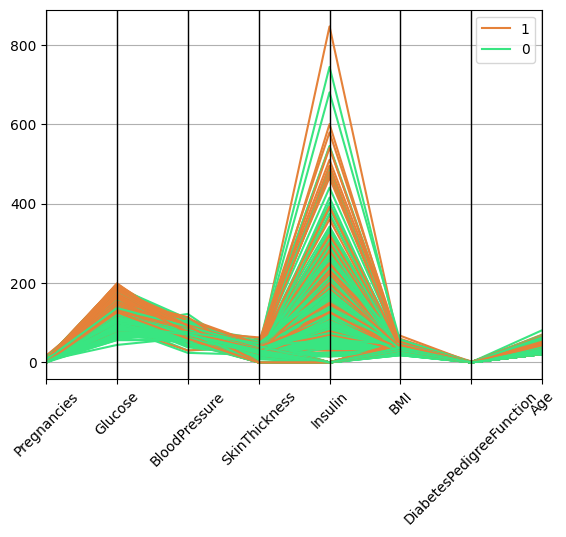

In [79]:
total_data = X
total_data["Outcome"] = y

pd.plotting.parallel_coordinates(total_data, "Outcome", color = ("#E58139", "#39E581", "#8139E5"))
plt.xticks(rotation=45)
plt.grid(True)  # Agregar líneas de cuadrícula para facilitar lectura
plt.show()

In [80]:
from sklearn.model_selection import train_test_split

# Supongamos que X son las características y y es la variable objetivo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Tamaño de X_train:", X_train.shape)
print("Tamaño de X_test:", X_test.shape)


Tamaño de X_train: (578, 9)
Tamaño de X_test: (145, 9)


In [81]:
# Modelos
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Configuración de los modelos
ada = AdaBoostClassifier(n_estimators=200, learning_rate=0.1, random_state=42)
gb = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, random_state=42)
xgb = XGBClassifier(n_estimators=200, learning_rate=0.1, random_state=42, use_label_encoder=False, eval_metric='mlogloss')
lgb = LGBMClassifier(n_estimators=200, learning_rate=0.1, random_state=42)


In [82]:
# Entrenamiento de los modelos
ada.fit(X_train, y_train)
gb.fit(X_train, y_train)
xgb.fit(X_train, y_train)
lgb.fit(X_train, y_train)


[LightGBM] [Info] Number of positive: 203, number of negative: 375
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000081 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 651
[LightGBM] [Info] Number of data points in the train set: 578, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.351211 -> initscore=-0.613720
[LightGBM] [Info] Start training from score -0.613720
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

/home/vscode/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [20:38:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


LGBMClassifier(n_estimators=200, random_state=42)

In [83]:
from sklearn.metrics import classification_report, accuracy_score

# Evaluar los modelos
modelos = {'AdaBoost': ada, 'GradientBoosting': gb, 'XGBoost': xgb, 'LightGBM': lgb}

for nombre, modelo in modelos.items():
    print(f"\nResultados para {nombre}:")
    # Predicciones
    y_pred_train = modelo.predict(X_train)
    y_pred_test = modelo.predict(X_test)

    # Métricas
    print("Entrenamiento:")
    print(classification_report(y_train, y_pred_train))
    print("Prueba:")
    print(classification_report(y_test, y_pred_test))
    print("Accuracy Test:", accuracy_score(y_test, y_pred_test))



Resultados para AdaBoost:
Entrenamiento:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       375
           1       1.00      1.00      1.00       203

    accuracy                           1.00       578
   macro avg       1.00      1.00      1.00       578
weighted avg       1.00      1.00      1.00       578

Prueba:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00        45

    accuracy                           1.00       145
   macro avg       1.00      1.00      1.00       145
weighted avg       1.00      1.00      1.00       145

Accuracy Test: 1.0

Resultados para GradientBoosting:
Entrenamiento:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       375
           1       1.00      1.00      1.00       203

    accuracy                           1.00       578
   macro 

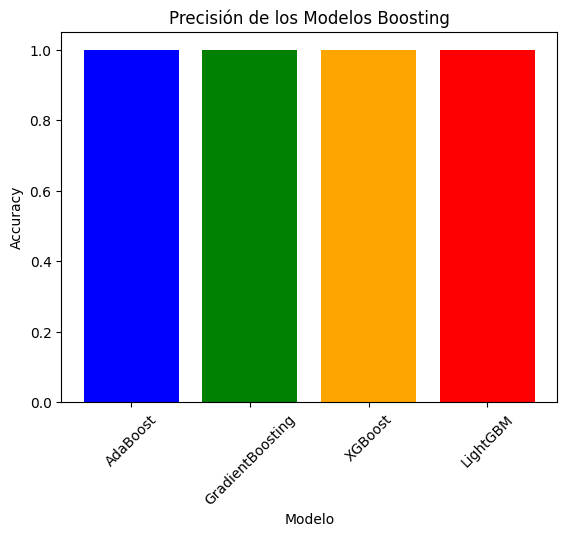

In [84]:
import matplotlib.pyplot as plt

# Comparar las precisiones
accuracies = {nombre: accuracy_score(y_test, modelo.predict(X_test)) for nombre, modelo in modelos.items()}

# Graficar las precisiones
plt.bar(accuracies.keys(), accuracies.values(), color=['blue', 'green', 'orange', 'red'])
plt.title("Precisión de los Modelos Boosting")
plt.ylabel("Accuracy")
plt.xlabel("Modelo")
plt.xticks(rotation=45)
plt.show()


In [85]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, modelo.predict(X_test)))
print(classification_report(y_test, modelo.predict(X_test)))
#Matriz de confusión: Evalúa la matriz de confusión para identificar si los modelos están prediciendo bien en todas las clases.

[[100   0]
 [  0  45]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00        45

    accuracy                           1.00       145
   macro avg       1.00      1.00      1.00       145
weighted avg       1.00      1.00      1.00       145



In [86]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(modelo, X, y, cv=5)
print("Validación cruzada (media):", scores.mean())
#Validación cruzada: Realiza validación cruzada para evaluar la generalización del modelo:


[LightGBM] [Info] Number of positive: 198, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000088 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 647
[LightGBM] [Info] Number of data points in the train set: 578, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.342561 -> initscore=-0.651904
[LightGBM] [Info] Start training from score -0.651904
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defi

In [87]:
print(X_train.shape, X_test.shape)
print(y_train.value_counts(), y_test.value_counts())
#Verifica los datos: Asegúrate de que los datos estén limpios y bien divididos:



(578, 9) (145, 9)
Outcome
0    375
1    203
Name: count, dtype: int64 Outcome
0    100
1     45
Name: count, dtype: int64


la precision de los modelos de boostin es de 1.0 por eso no se sigue trabajando